<a href="https://colab.research.google.com/github/kmk028/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/Linear_Algebra_Sprint_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Linear Algebra

## 1.1 Graph vector $\vec{a}$ 

\begin{align}
\vec{a} = \begin{bmatrix} 3 \\ 2 \end{bmatrix}
\end{align}

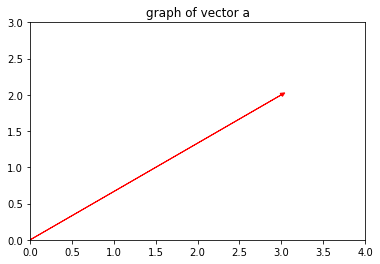

In [4]:
import numpy as np
import matplotlib.pyplot as plt

a = [3,2]

plt.arrow(0,0,a[0],a[1],head_width = 0.05,head_length= 0.05, color = 'r')
plt.xlim(0,4)
plt.ylim(0,3)
plt.title('graph of vector a')
plt.show();

## 1.2 Find $||\vec{b}||$. What does the norm of a vector represent?
\begin{align}
\vec{b} = \begin{bmatrix} 17 & -4 & -2 & 1\end{bmatrix}
\end{align}


In [5]:
b = [17,-4,-2,1]

print (f"Magnitude of vector b is {np.linalg.norm(b)}")

Magnitude of vector b is 17.60681686165901


## 1.3 Find $\vec{c} \cdot \vec{d}$ - Are these vectors orthogonal? Why or why not?

\begin{align}
\vec{c} = \begin{bmatrix}3 & 7 & -2 & 12\end{bmatrix}
\qquad
\vec{d} = \begin{bmatrix}9 & -7 & 4 & 6\end{bmatrix}
\end{align}

In [7]:
c = [3,7,-2,12]
d = [9,-7, 4, 6]

print (f"Dot product of vector c and d is {np.dot(c,d)}")

Dot product of vector c and d is 42


In [8]:
if (np.dot(c,d) == 0):
  print('Vectors c and d are orthogonal')
else:
  print('Vectors c and d are not orthogonal')

Vectors c and d are not orthogonal


Dot prod is c.d.cosine(angle between c and d). 
so if angle is 90 its dot prod is 0. since we get non-zero value these vectors are not orthogonal

## 1.4 Find $E^{-1}$ and $E^{T}$

\begin{align}
E = 
\begin{bmatrix}
    7 & 4 & 2 \\
    1 & 3 & -1 \\
    2 & 6 & -4
\end{bmatrix}
\end{align}

In [13]:
E = np.matrix('7 4 2;1 3 -1;2 6 -4')

print (f'Transpose of matrix E is \n {E.T}')

print (f'Inverse of matrix E is \n {np.linalg.inv(E)}')

Transpose of matrix E is 
 [[ 7  1  2]
 [ 4  3  6]
 [ 2 -1 -4]]
Inverse of matrix E is 
 [[ 0.17647059 -0.82352941  0.29411765]
 [-0.05882353  0.94117647 -0.26470588]
 [ 0.          1.         -0.5       ]]


# Intermediate Linear Algebra

## 2.1 Suppose that the number of customers at a ski resort as well as the number of inches of fresh powder (snow)  was recorded for 7 days. 

### Customers: [820, 760, 1250, 990, 1080, 1450, 1600]

### Inches of new snow: [0, 1, 7, 1, 0, 6, 4 ]

## Find the mean, variance, and standard deviation for both the number of customers and inches of new snow for the week. You may use library functions, dataframes, .describe(), etc. 



In [16]:
import pandas as pd

customers = [820, 760, 1250, 990, 1080, 1450, 1600]
snow = [0, 1, 7, 1, 0, 6, 4]

df = pd.DataFrame({'customers': customers, 'snow': snow})

df.head()

,customers,snow
0,820,0
1,760,1
2,1250,7
3,990,1
4,1080,0


In [18]:
# Mean and standard deviation of customers and snow 
df.describe(include=[np.number])


,customers,snow
count,7.000000,7.000000
mean,1135.714286,2.714286
std,314.264069,2.927700
min,760.000000,0.000000
25%,905.000000,0.500000
50%,1080.000000,1.000000
75%,1350.000000,5.000000
max,1600.000000,7.000000


In [22]:
# variance of customers and snow
df['customers'].var()

98761.90476190478

In [23]:
df['snow'].var()

8.571428571428571

## 2.2 Are the variances of the number of customers and inches of snow comparable? 
## Why or why not? 

No. variances are not comparable because we need to standardize before comparing. (finding mean and subtracting it from data. then dividing by standard deviatioin)

## 2.3 Find the variance-covariance matrix for the number of customers and inches of snow at the ski resort. 

In [26]:
var_covar_matrix = np.cov(df['customers'],df['snow'])
print (var_covar_matrix)

[[9.87619048e+04 6.70238095e+02]
 [6.70238095e+02 8.57142857e+00]]


# PCA

## 3.1 Standardize the data so that it has a mean of 0 and a standard deviation of 1. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing the data or PCA.

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html>

In [30]:
# Let me get you some data to start you off.
import pandas as pd

data = {"Country": ["England","Wales","Scotland","North Ireland"], 
        "Cheese": [105,103,103,66], 
        "Carcass_Meat": [245,227,242,267], 
        "Other_Meat": [685, 803, 750, 586], 
        "Fish": [147, 160, 122, 93], 
        "Fats_and_Oils": [193, 235, 184, 209], 
        "Sugars": [156, 175, 147, 139], 
        "Fresh_Potatoes": [720, 874, 566, 1033], 
        "Fresh_Veg": [253, 265, 171, 143], 
        "Other_Veg": [488, 570, 418, 355], 
        "Processed_Potatoes": [198, 203, 220, 187], 
        "Processed_Veg": [360, 365, 337, 334], 
        "Fresh_Fruit": [1102, 1137, 957, 674], 
        "Cereals": [1472, 1582, 1462, 1494], 
        "Beverages": [57,73,53,47], 
        "Soft_Drinks": [1374, 1256, 1572, 1506], 
        "Alcoholic Drinks": [375, 475, 458, 135], 
        "Confectionery": [54, 64, 62, 41]}

df = pd.DataFrame(data)

# Look at the data
df.head()

,Country,Cheese,Carcass_Meat,Other_Meat,Fish,Fats_and_Oils,Sugars,Fresh_Potatoes,Fresh_Veg,Other_Veg,Processed_Potatoes,Processed_Veg,Fresh_Fruit,Cereals,Beverages,Soft_Drinks,Alcoholic Drinks,Confectionery
0,England,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
1,Wales,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
2,Scotland,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
3,North Ireland,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


In [32]:
df = df.drop(['Country'],axis=1)
df.head()

,Cheese,Carcass_Meat,Other_Meat,Fish,Fats_and_Oils,Sugars,Fresh_Potatoes,Fresh_Veg,Other_Veg,Processed_Potatoes,Processed_Veg,Fresh_Fruit,Cereals,Beverages,Soft_Drinks,Alcoholic Drinks,Confectionery
0,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
1,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
2,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
3,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


In [35]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
#stand_df = scalar.fit_transform(df)
stand_df = pd.DataFrame(scalar.fit_transform(df))
stand_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.658275,-0.017495,-0.259546,0.644585,-0.632429,0.130551,-0.450076,0.863312,0.377736,-0.336265,0.805477,0.737407,-0.644322,-0.051917,-0.435231,0.104998,-0.138303
1,0.535805,-1.277169,1.198856,1.152440,1.535899,1.547958,0.435696,1.093528,1.401682,0.084066,1.171603,0.929297,1.679463,1.609440,-1.404236,0.841823,0.968122
2,0.535805,-0.227441,0.543811,-0.332059,-1.097071,-0.540853,-1.335847,-0.709834,-0.496364,1.513193,-0.878702,-0.057567,-0.855575,-0.467257,1.190727,0.716563,0.746837
3,-1.729885,1.522105,-1.483121,-1.464967,0.193601,-1.137656,1.350227,-1.247006,-1.283054,-1.260994,-1.098378,-1.609137,-0.179565,-1.090266,0.648741,-1.663384,-1.576656


In [40]:
stand_df.describe(include=[np.number])

# From ouput below mean is 0 for all features and Standard deviation is close to 1 in most cases

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
count,4.000000,4.000000,4.000000,4.000000,4.000000e+00,4.000000e+00,4.000000,4.000000e+00,4.000000,4.000000,4.000000e+00,4.000000,4.000000e+00,4.000000e+00,4.000000e+00,4.000000,4.000000e+00
mean,0.000000,0.000000,0.000000,0.000000,6.938894e-18,-5.551115e-17,0.000000,5.551115e-17,0.000000,0.000000,-5.551115e-17,0.000000,6.938894e-18,-5.551115e-17,-2.775558e-17,0.000000,5.551115e-17
std,1.154701,1.154701,1.154701,1.154701,1.154701e+00,1.154701e+00,1.154701,1.154701e+00,1.154701,1.154701,1.154701e+00,1.154701,1.154701e+00,1.154701e+00,1.154701e+00,1.154701,1.154701e+00
min,-1.729885,-1.277169,-1.483121,-1.464967,-1.097071e+00,-1.137656e+00,-1.335847,-1.247006e+00,-1.283054,-1.260994,-1.098378e+00,-1.609137,-8.555755e-01,-1.090266e+00,-1.404236e+00,-1.663384,-1.576656e+00
25%,-0.030617,-0.489873,-0.565440,-0.615286,-7.485897e-01,-6.900536e-01,-0.671519,-8.441271e-01,-0.693036,-0.567447,-9.336213e-01,-0.445460,-6.971356e-01,-6.230090e-01,-6.774824e-01,-0.337098,-4.978915e-01
50%,0.535805,-0.122468,0.142132,0.156263,-2.194142e-01,-2.051511e-01,-0.007190,7.673883e-02,-0.059314,-0.126099,-3.661260e-02,0.339920,-4.119437e-01,-2.595871e-01,1.067548e-01,0.410780,3.042670e-01
75%,0.566422,0.367405,0.707572,0.771549,5.291754e-01,4.849025e-01,0.664329,9.208660e-01,0.633722,0.441348,8.970087e-01,0.785380,2.851918e-01,3.634219e-01,7.842372e-01,0.747878,8.021585e-01
max,0.658275,1.522105,1.198856,1.152440,1.535899e+00,1.547958e+00,1.350227,1.093528e+00,1.401682,1.513193,1.171603e+00,0.929297,1.679463e+00,1.609440e+00,1.190727e+00,0.841823,9.681224e-01


## 3.2 Perform PCA on the data and graph Principal Component 1 against Principal Component 2. (You may use library functions)

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html>

In [41]:
from sklearn.decomposition import PCA
pca = PCA(2)
pca.fit(df)
B = pd.DataFrame(pca.transform(df))
B.head()


,0,1
0,-144.993152,-2.532999
1,-240.529148,-224.646925
2,-91.869339,286.081786
3,477.391639,-58.901862


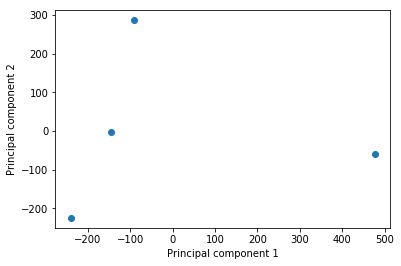

In [47]:
plt.scatter(B[0],B[1]);
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.show();

# Clustering

## 4.1 Use K-Means to cluster the following data and then graph your results. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing clustering.

Prioritize calculating the clusters over graphing them. 

Scikit-Learn K-Means Documentation:

<https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html>

In [49]:
points = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/points.csv')
points.head()

,x,y
0,-7.846803,-3.421277
1,-3.554323,-6.884729
2,-0.192822,-9.671030
3,-6.401456,-5.223972
4,-0.804026,-9.704457


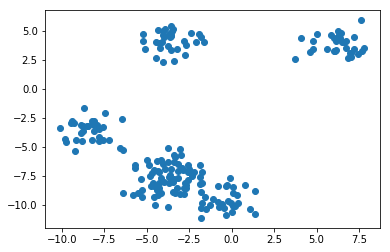

In [50]:
plt.scatter(points['x'],points['y'])
plt.show();

From graph looks like we have 4 or maybe 5 clusters. Since its unclear, will use elbow method

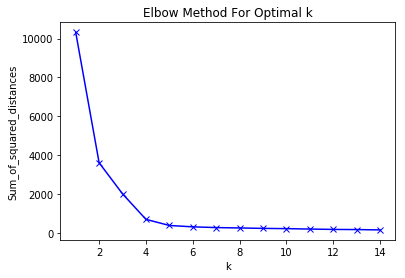

In [52]:
# elbow method
from sklearn.cluster import KMeans
sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(points)
    sum_of_squared_distances.append(km.inertia_)

plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show();
    
    

Well that did not help. I'll go with 4 clusters from eyeballing the scatter plot. 

In [54]:
#Pick 4 fake centroids
centroids = points.sample(4)
centroids.head()

,x,y
62,-8.748600,-3.224303
40,1.367391,-10.774582
115,-4.876902,-6.516695
1,-3.554323,-6.884729


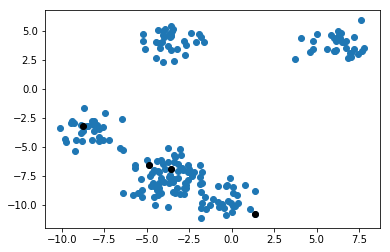

In [73]:
#plot Fake centroids

ax = plt.subplot(1,1,1)
ax.scatter(points.x, points.y)
ax.plot(centroids.iloc[0].x, centroids.iloc[0].y, "ok")
ax.plot(centroids.iloc[1].x, centroids.iloc[1].y, "ok")
ax.plot(centroids.iloc[2].x, centroids.iloc[2].y, "ok")
ax.plot(centroids.iloc[3].x, centroids.iloc[3].y, "ok")
plt.show();

In [0]:
import math
from scipy.spatial import distance

In [0]:
# Calculate the Nearest Centroid to each data point
def find_nearest_centroid(df, centroids, iteration):
 
  # calculate the distances between each point and each centroid
  distances = distance.cdist(df, centroids, 'euclidean')
  
  # Get nearest centroid to each point based on distance
  nearest_centroids = np.argmin(distances, axis=1)

  se = pd.Series(nearest_centroids)
  df['cluster_'+iteration] = se.values
  
  return df

In [0]:
def plot_clusters(df, column_header, centroids):
  colors = {0:'red', 1:'green',2:'yellow', 3:'blue'}
  fig, ax = plt.subplots()
  ax.plot(centroids.iloc[0].x, centroids.iloc[0].y, "ok")
  ax.plot(centroids.iloc[1].x, centroids.iloc[1].y, "ok")
  ax.plot(centroids.iloc[2].x, centroids.iloc[2].y, "ok")
  ax.plot(centroids.iloc[3].x, centroids.iloc[3].y, "ok")
  grouped = df.groupby(column_header)
  for key, group in grouped:
      group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
  plt.show()

In [0]:
def get_centroids(df, column_header):
  new_centroids = df.groupby(column_header).mean()
  return new_centroids

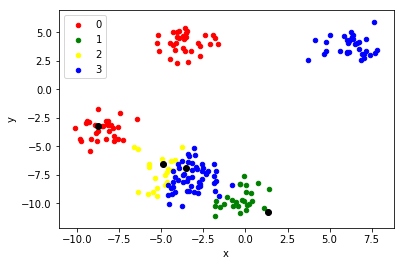

In [81]:
first_pass = find_nearest_centroid(points.select_dtypes(exclude='int64'), centroids, '1')
plot_clusters(first_pass, 'cluster_1', centroids)

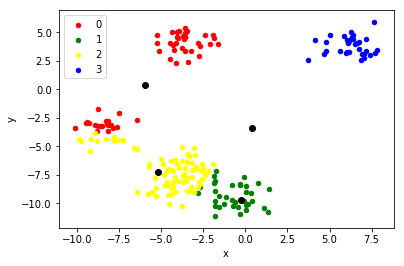

In [82]:
# Calculate New Centroids
centroids = get_centroids(first_pass, 'cluster_1')

# Get Clusters for New Centroids
second_pass = find_nearest_centroid(first_pass.select_dtypes(exclude='int64'), centroids, '2')

# Plot New Cluster
plot_clusters(second_pass, 'cluster_2', centroids)

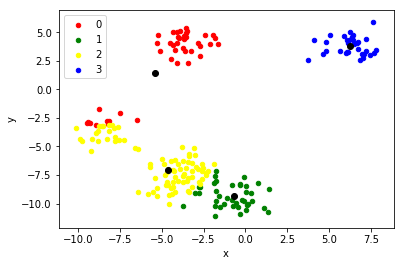

In [83]:
# Calculate New Centroids
centroids = get_centroids(second_pass, 'cluster_2')

# Get Clusters for New Centroids
third_pass = find_nearest_centroid(second_pass.select_dtypes(exclude='int64'), centroids, '3')

# Plot New Cluster
plot_clusters(third_pass, 'cluster_3', centroids)

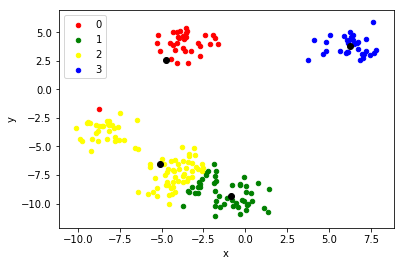

In [84]:
# Calculate New Centroids
centroids = get_centroids(third_pass, 'cluster_3')

# Get Clusters for New Centroids
fourth_pass = find_nearest_centroid(third_pass.select_dtypes(exclude='int64'), centroids, '4')

# Plot New Cluster
plot_clusters(fourth_pass, 'cluster_4', centroids)

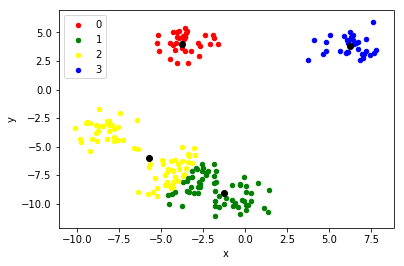

In [85]:
# Calculate New Centroids
centroids = get_centroids(fourth_pass, 'cluster_4')

# Get Clusters for New Centroids
fifth_pass = find_nearest_centroid(fourth_pass.select_dtypes(exclude='int64'), centroids, '5')

# Plot New Cluster
plot_clusters(fifth_pass, 'cluster_5', centroids)

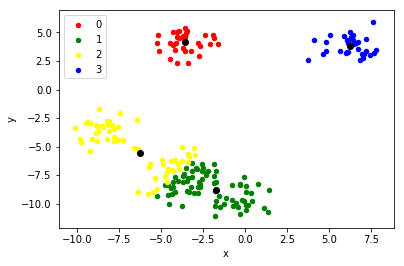

In [86]:
# Calculate New Centroids
centroids = get_centroids(fifth_pass, 'cluster_5')

# Get Clusters for New Centroids
sixth_pass = find_nearest_centroid(fifth_pass.select_dtypes(exclude='int64'), centroids, '6')

# Plot New Cluster
plot_clusters(sixth_pass, 'cluster_6', centroids)

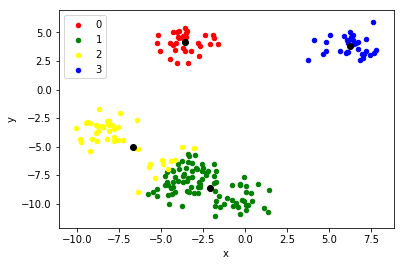

In [90]:
# Calculate New Centroids
centroids = get_centroids(sixth_pass, 'cluster_6')

# Get Clusters for New Centroids
seventh_pass = find_nearest_centroid(sixth_pass.select_dtypes(exclude='int64'), centroids, '7')

# Plot New Cluster
plot_clusters(seventh_pass, 'cluster_7', centroids)

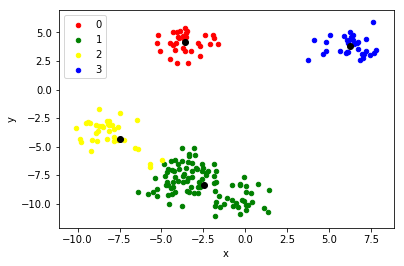

In [91]:
# Calculate New Centroids
centroids = get_centroids(seventh_pass, 'cluster_7')

# Get Clusters for New Centroids
eighth_pass = find_nearest_centroid(seventh_pass.select_dtypes(exclude='int64'), centroids, '8')

# Plot New Cluster
plot_clusters(eighth_pass, 'cluster_8', centroids)

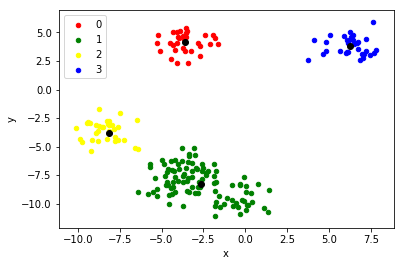

In [92]:
# Calculate New Centroids
centroids = get_centroids(eighth_pass, 'cluster_8')

# Get Clusters for New Centroids
ninth_pass = find_nearest_centroid(eighth_pass.select_dtypes(exclude='int64'), centroids, '9')

# Plot New Cluster
plot_clusters(ninth_pass, 'cluster_9', centroids)

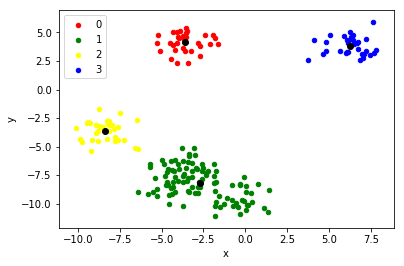

In [93]:
# Calculate New Centroids
centroids = get_centroids(ninth_pass, 'cluster_9')

# Get Clusters for New Centroids
tenth_pass = find_nearest_centroid(ninth_pass.select_dtypes(exclude='int64'), centroids, '10')

# Plot New Cluster
plot_clusters(tenth_pass, 'cluster_10', centroids)

In [94]:
convergence = np.array_equal(ninth_pass['cluster_9'], tenth_pass['cluster_10'])

print("Are we at convergence?? - ", convergence)

Are we at convergence?? -  True


In [95]:
# centroids of 4-means clustering

print(centroids)

                  x         y
cluster_9                    
0         -3.597407  4.133441
1         -2.733593 -8.204353
2         -8.366530 -3.612381
3          6.249793  3.844572
